<a href="https://colab.research.google.com/github/LiquidSeas/Data-science-project/blob/main/CUSTOMER_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Importing Data
2.   Exploratory Data Analysis
3.   Visualization
4.   Data Preprocessing
       *   Encoding
       *   Scalling
       *   Imputing
5.Featured Models:

    *   Decision TreeClassifier
    *   Support Vector Machines
    *   GradientBoostingClassifier
    *   Deep learning

6. Modelling steps

    *   Training
    *   Error analysis
    *   Parameter search(Grid Search CV)
    *Testing



       





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/telecom_customer_churn.csv',)
pd.options.display.max_columns = None

In [ ]:
data.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
data.iloc[7040]

Customer ID                              9992-UJOEL
Gender                                         Male
Age                                              22
Married                                          No
Number of Dependents                              0
City                                            Elk
Zip Code                                      95432
Latitude                                  39.108252
Longitude                               -123.645121
Number of Referrals                               0
Tenure in Months                                  2
Offer                                       Offer E
Phone Service                                   Yes
Avg Monthly Long Distance Charges             18.62
Multiple Lines                                   No
Internet Service                                Yes
Internet Type                                   DSL
Avg Monthly GB Download                        51.0
Online Security                                  No
Online Backu

In [ ]:
data.tail(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,2,Offer E,Yes,18.62,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.0,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed,NaN,NaN
7042,9995-HOTOH,Male,36,Yes,0,Sierra City,96125,39.600599,-120.636358,1,63,None,No,NaN,NaN,Yes,Cable,5.0,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,59.00,3707.60,0.0,0,0.00,3707.60,Stayed,NaN,NaN


In [ ]:
data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
dtype: object

FrozenList([None])

In [ ]:
data[['Customer Status','Churn Category','Churn Reason']].head(5)

,Customer Status,Churn Category,Churn Reason
0,Stayed,NaN,NaN
1,Stayed,NaN,NaN
2,Churned,Competitor,Competitor had better devices
3,Churned,Dissatisfaction,Product dissatisfaction
4,Churned,Dissatisfaction,Network reliability


In [ ]:
stayed=data[data['Customer Status']=='Stayed' ]
stayed.shape
stayed

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,9,Offer E,Yes,16.77,No,Yes,Cable,73.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,71,Offer A,Yes,9.96,No,Yes,Fiber Optic,14.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,63,Offer B,Yes,12.96,Yes,Yes,Fiber Optic,7.0,Yes,No,No,Yes,No,No,No,No,Two Year,Yes,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,9978-HYCIN,Male,72,Yes,1,Bakersfield,93301,35.383937,-119.020428,1,47,None,Yes,42.29,No,Yes,Fiber Optic,22.0,No,Yes,No,No,Yes,No,No,No,One Year,Yes,Bank Withdrawal,84.95,4018.05,0.00,80,1987.63,6085.68,Stayed,NaN,NaN
7035,9979-RGMZT,Female,20,No,0,Los Angeles,90022,34.023810,-118.156582,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42.0,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.00,0,255.43,888.88,Stayed,NaN,NaN
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


data

In [ ]:
data['Churn Reason'].unique()

array([nan, 'Competitor had better devices', 'Product dissatisfaction',
       'Network reliability', 'Limited range of services',
       'Competitor made better offer', "Don't know",
       'Long distance charges', 'Attitude of service provider',
       'Attitude of support person',
       'Competitor offered higher download speeds',
       'Competitor offered more data',
       'Lack of affordable download/upload speed', 'Deceased', 'Moved',
       'Service dissatisfaction', 'Price too high',
       'Lack of self-service on Website',
       'Poor expertise of online support', 'Extra data charges',
       'Poor expertise of phone support'], dtype=object)

In [ ]:
male=data[(data['Gender']=='Male') & (data['Customer Status']=='Churned')]
male

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
18,0022-TCJCI,Male,79,No,0,Daly City,94015,37.680844,-122.481310,0,45,None,Yes,10.67,No,Yes,DSL,17.0,Yes,No,Yes,No,No,Yes,No,Yes,One Year,No,Credit Card,62.70,2791.50,0.00,0,480.15,3271.65,Churned,Dissatisfaction,Limited range of services
19,0023-HGHWL,Male,67,No,0,Morgan Hill,95037,37.161544,-121.649371,0,1,None,No,NaN,NaN,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.10,25.10,0.00,0,0.00,25.10,Churned,Competitor,Competitor made better offer
40,0067-DKWBL,Male,69,No,0,San Diego,92129,32.961064,-117.134917,0,2,None,Yes,43.99,No,Yes,DSL,27.0,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,49.25,91.10,0.00,0,87.98,179.08,Churned,Competitor,Competitor made better offer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,9947-OTFQU,Male,65,No,0,Covina,91722,34.097345,-117.906736,0,15,Offer D,Yes,29.11,No,Yes,Fiber Optic,29.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,74.40,1074.30,0.00,0,436.65,1510.95,Churned,Competitor,Competitor had better devices
7013,9948-YPTDG,Male,44,Yes,0,San Rafael,94903,38.018065,-122.546024,1,38,None,Yes,35.61,No,Yes,Fiber Optic,13.0,Yes,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.45,3013.05,9.36,40,1353.18,4396.87,Churned,Competitor,Competitor offered more data
7020,9961-JBNMK,Male,79,No,0,Desert Center,92239,33.889605,-115.257009,0,21,None,Yes,42.27,No,Yes,Fiber Optic,7.0,No,No,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,-1.00,2030.30,10.20,0,887.67,2907.77,Churned,Dissatisfaction,Product dissatisfaction
7023,9965-YOKZB,Male,73,No,0,Grizzly Flats,95636,38.636102,-120.522149,0,9,None,Yes,10.04,Yes,Yes,Fiber Optic,13.0,No,No,No,No,No,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,83.85,790.15,0.00,0,90.36,880.51,Churned,Dissatisfaction,Network reliability


In [ ]:
female=data[(data['Gender']=='Female') & (data['Customer Status']=='Churned')]
female

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
21,0023-XUOPT,Female,26,Yes,0,Carnelian Bay,96140,39.227434,-120.091806,1,13,None,Yes,43.56,Yes,Yes,Fiber Optic,52.0,No,Yes,Yes,No,Yes,No,No,Yes,Month-to-Month,No,Bank Withdrawal,94.10,1215.60,0.0,0,566.28,1781.88,Churned,Other,Don't know
24,0031-PVLZI,Female,34,Yes,0,Korbel,95550,40.766600,-123.804580,0,4,Offer E,Yes,12.43,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,20.35,76.35,0.0,0,49.72,126.07,Churned,Price,Long distance charges
25,0032-PGELS,Female,37,Yes,1,Palomar Mountain,92060,33.309852,-116.823091,1,1,None,No,NaN,NaN,Yes,DSL,19.0,Yes,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,30.50,30.50,0.0,0,0.00,30.50,Churned,Attitude,Attitude of service provider
54,0094-OIFMO,Female,78,No,1,North Hollywood,91605,34.207295,-118.400022,0,11,Offer D,Yes,11.59,No,Yes,Fiber Optic,29.0,No,Yes,No,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,95.00,1120.30,0.0,120,127.49,1367.79,Churned,Dissatisfaction,Product dissatisfaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,9940-HPQPG,Female,58,Yes,0,North Hollywood,91601,34.169200,-118.372498,1,9,Offer E,Yes,22.00,Yes,Yes,Fiber Optic,7.0,Yes,Yes,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,91.75,865.80,0.0,0,198.00,1063.80,Churned,Price,Extra data charges
7007,9940-RHLFB,Female,53,No,0,Sunset Beach,90742,33.719221,-118.073596,0,1,Offer E,Yes,26.06,No,Yes,Fiber Optic,3.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.30,75.30,0.0,0,26.06,101.36,Churned,Competitor,Competitor made better offer
7010,9944-HKVVB,Female,55,No,0,King City,93930,36.220761,-120.980777,0,3,Offer E,Yes,47.62,No,Yes,Cable,29.0,No,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.10,307.40,0.0,0,142.86,450.26,Churned,Competitor,Competitor had better devices
7036,9985-MWVIX,Female,53,No,0,Hume,93628,36.807595,-118.901544,0,1,Offer E,Yes,42.09,No,Yes,Fiber Optic,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,70.15,70.15,0.0,0,42.09,112.24,Churned,Competitor,Competitor had better devices


In [ ]:
reasons=data['Churn Reason'].unique()
reasons

array([nan, 'Competitor had better devices', 'Product dissatisfaction',
       'Network reliability', 'Limited range of services',
       'Competitor made better offer', "Don't know",
       'Long distance charges', 'Attitude of service provider',
       'Attitude of support person',
       'Competitor offered higher download speeds',
       'Competitor offered more data',
       'Lack of affordable download/upload speed', 'Deceased', 'Moved',
       'Service dissatisfaction', 'Price too high',
       'Lack of self-service on Website',
       'Poor expertise of online support', 'Extra data charges',
       'Poor expertise of phone support'], dtype=object)

<ipython-input-71-93e1044a2a15>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=pd.concat([male, female]), palette="Set1")


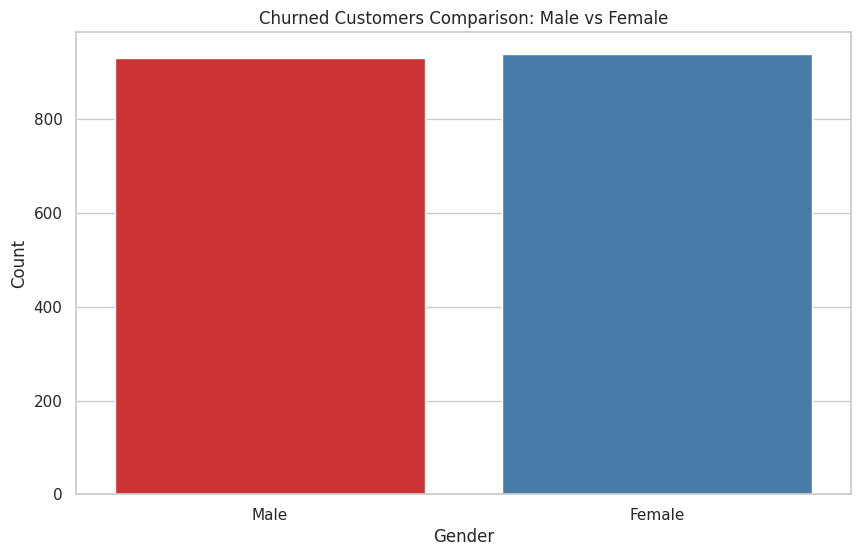

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Countplot for Churned Male and Female
sns.countplot(x='Gender', data=pd.concat([male, female]), palette="Set1")
plt.title('Churned Customers Comparison: Male vs Female')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()


In [ ]:
stayed[stayed['Customer Status']=='Stayed'].shape
stayed[stayed['Churn Category'] !='NaN'].shape
stayed[stayed['Churn Reason']=='NaN'].shape
#All customers who stayed have consistent Churn Reasons.

(0, 38)

In [ ]:
data.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [ ]:
data['Churn Category'].value_counts()

Competitor         841
Dissatisfaction    321
Attitude           314
Price              211
Other              182
Name: Churn Category, dtype: int64

In [ ]:
data['Churn Category'].unique()

array([nan, 'Competitor', 'Dissatisfaction', 'Other', 'Price', 'Attitude'],
      dtype=object)

In [ ]:
df=data['Churn Category'].copy()
churn_category= {'Category': ['Competitor', 'Dissatisfaction', 'Other', 'Price', 'Attitude'],
        'Values': [841,321,314,211,182]}
churn_category_df=pd.DataFrame(churn_category)
churn_category_df

,Category,Values
0,Competitor,841
1,Dissatisfaction,321
2,Other,314
3,Price,211
4,Attitude,182


**VISUALIZATION:** Distribution of churn categories.

<Axes: xlabel='Category', ylabel='Values'>

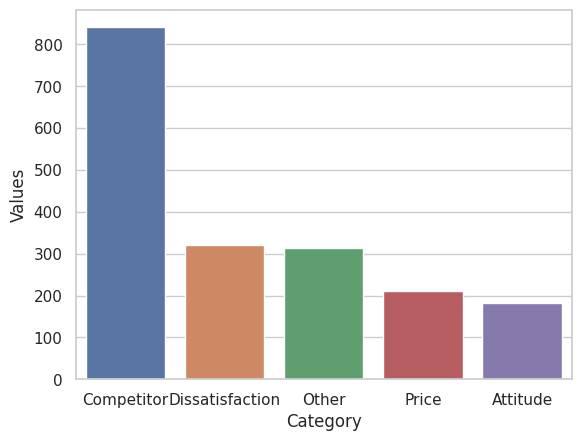

In [ ]:
sns.barplot(data=churn_category_df,x='Category',y='Values',hue='Category')


**VISUALIZATION**: Distribution of churn reasons across both genders.

<Axes: xlabel='Gender', ylabel='Count'>

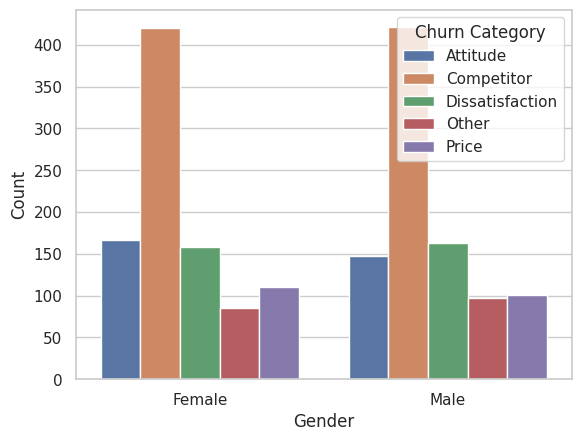

In [ ]:

both_genders_churned=pd.concat([male,female])
both_genders_churned
churn_counts = both_genders_churned.groupby(['Gender','Churn Category']).size().reset_index(name='Count')
churn_counts
isinstance(churn_counts, pd.DataFrame)
sns.barplot(data=churn_counts, x='Gender', y='Count', hue='Churn Category')


PREPROCESSING: Transforming categorical features into ordinal integers


*   To simplify the input
*   To speed learning process



              
              



In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data=encoder.fit_transform(data)

In [ ]:
encoded_data=pd.DataFrame(data)
encoded_data.columns=cols


In [ ]:
target=encoded_data['Customer Status'].copy()
target

0       2.0
1       2.0
2       0.0
3       0.0
4       0.0
       ... 
7038    2.0
7039    0.0
7040    1.0
7041    2.0
7042    2.0
Name: Customer Status, Length: 7043, dtype: float64

In [ ]:
column_ranges = encoded_data.apply(lambda col: col.max() - col.min())
column_ranges
#COLUMNS TO BE SCALLED: All columns with range greater than 2
cols_range_greater_than_2=column_ranges[column_ranges>2]
cols_range_greater_than_2.index

Index(['Customer ID', 'Age', 'Number of Dependents', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [ ]:
columns_to_be_scalled=encoded_data[['Age', 'Number of Dependents', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue']].copy()



In [ ]:
cols_names = columns_to_be_scalled.columns
cols_names

Index(['Age', 'Number of Dependents', 'City', 'Zip Code', 'Latitude',
       'Longitude', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

Under Customer Status, the following are implied for each customer:


*    0:Churned
*    1:Joined
*    2:Stayed

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scalled=scaler.fit_transform(columns_to_be_scalled)
scalled=pd.DataFrame(scalled)
scalled.columns=cols_names
scalled

,Age,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0.295082,0.0,0.313122,0.398769,0.395077,0.590517,0.181818,0.112676,0.0,0.848130,0.291667,0.408176,0.273742,0.000000,0.000000,0.426735,0.322484
1,0.442623,0.0,0.333032,0.112615,0.311385,0.722291,0.000000,0.112676,0.0,0.201843,0.166667,0.003774,0.259214,0.749499,0.066667,0.197956,0.246487
2,0.508197,0.0,0.200905,0.328615,0.089231,0.791256,0.000000,0.042254,1.0,0.662200,0.583333,0.498742,0.167916,0.000000,0.000000,0.241965,0.197878
3,0.967213,0.0,0.531222,0.590154,0.703385,0.191502,0.090909,0.169014,0.8,0.544389,0.041667,0.785535,0.432788,0.000000,0.000000,0.413384,0.427732
4,0.918033,0.0,0.125792,0.372923,0.337231,0.583128,0.272727,0.028169,0.0,0.135678,0.187500,0.616981,0.162104,0.000000,0.000000,0.056206,0.159880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.016393,0.0,0.443439,0.185231,0.020923,0.938424,0.000000,0.169014,0.8,0.931882,0.854167,0.296226,0.313657,0.000000,0.000000,0.531235,0.386722
7039,0.344262,0.0,0.748416,0.742154,0.633231,0.402094,0.090909,0.295775,0.8,0.311837,0.312500,0.632075,0.553143,0.000000,0.000000,0.410747,0.511471
7040,0.049180,0.0,0.267873,0.763692,0.859077,0.026478,0.000000,0.014085,1.0,0.362926,0.729167,0.245912,0.072182,0.000000,0.000000,0.098731,0.100946
7041,0.032787,0.0,0.841629,0.210462,0.045538,0.881158,0.454545,0.929577,0.2,0.025126,0.833333,0.430189,0.797523,0.000000,0.000000,0.249547,0.745770


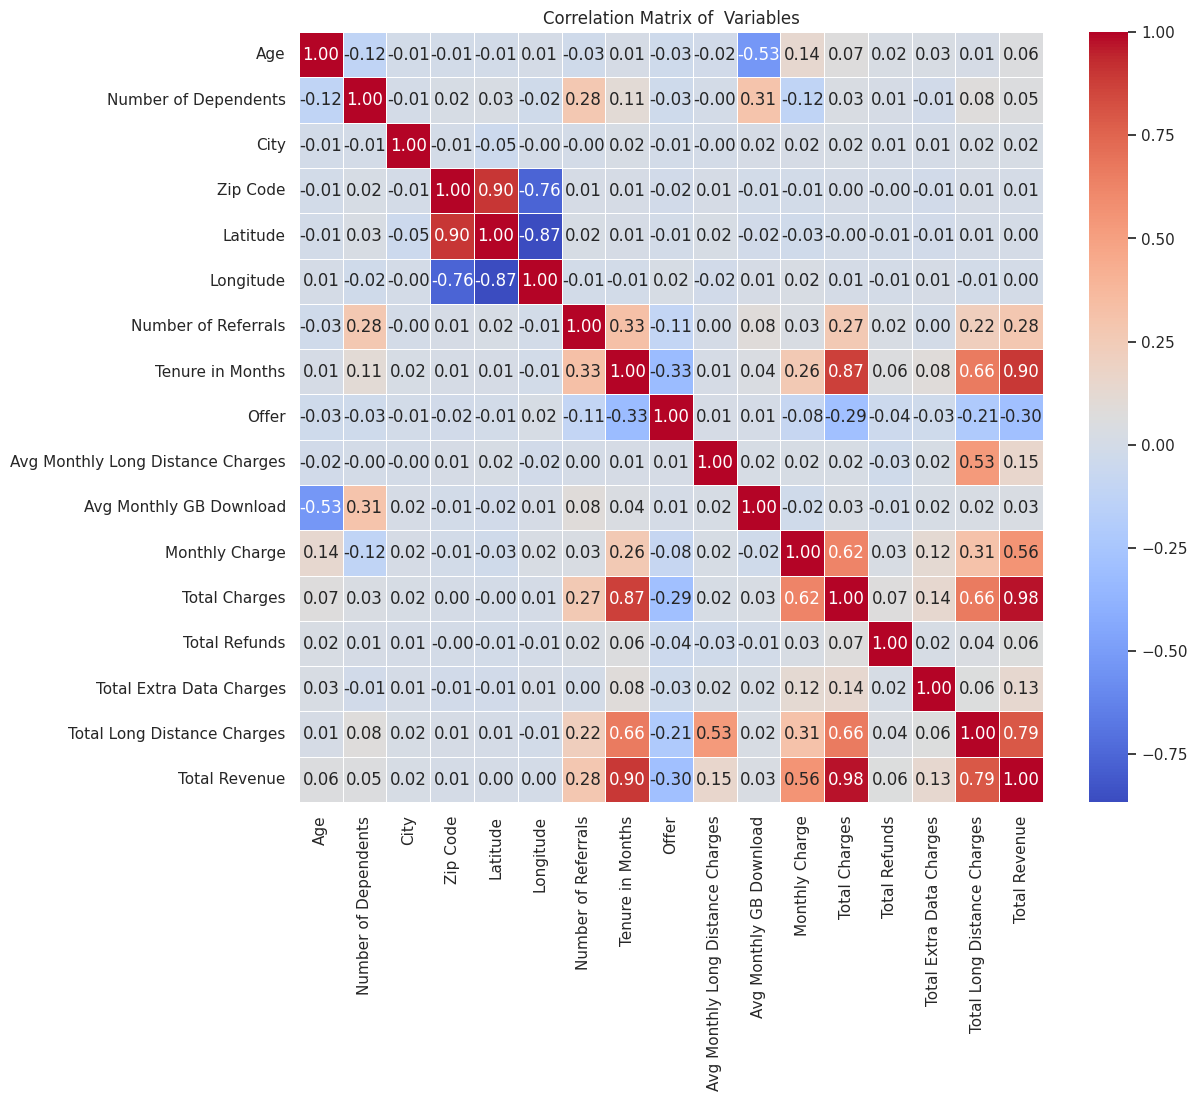

In [ ]:
corr_matrix = scalled.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of  Variables')
plt.show()

In [ ]:
target


0       2.0
1       2.0
2       0.0
3       0.0
4       0.0
       ... 
7038    2.0
7039    0.0
7040    1.0
7041    2.0
7042    2.0
Name: Customer Status, Length: 7043, dtype: float64

In [ ]:
def array_to_dataframe(input_array_data):
  input_array_data=pd.DataFrame(input_array_data)
  return input_array_data


Model selection:

*   _test:Testing feature
*   _val:Validation features
*   _train:Training features






In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_T, y_train, y_t = train_test_split(scalled, target, test_size=0.30, random_state=42)
x_train.shape, x_T.shape, y_train.shape, y_t.shape
x_test, x_Val,y_Test,y_Val = train_test_split(x_T, y_t, test_size=0.50, random_state=42)
x_train.shape, x_T.shape, y_train.shape, y_t.shape

((4930, 17), (2113, 17), (4930,), (2113,))

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', fill_value=0)
x_train = imputer.fit_transform(x_train)
x_train =array_to_dataframe(x_train)
x_test = imputer.fit_transform(x_test)
x_test =array_to_dataframe(x_test)
X_Val = imputer.fit_transform(x_Val)
X_Val =array_to_dataframe(X_Val)

In [ ]:
x_train.columns=cols_names
x_train=pd.DataFrame(x_train)

**MODEL TRAINING**

Selected Models:

1.   Decision TreeClassifier
2.   Support Vector Machines
3.   GradientBoostingClassifier






1.Decision TreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
TreeClassifier=DecisionTreeClassifier(ccp_alpha=0.0115, criterion='entropy', max_depth=40,max_features='sqrt', random_state=42)
TreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0115, criterion='entropy', max_depth=40,
                       max_features='sqrt', random_state=42)

In [ ]:
#Making Prediction
y_pred=TreeClassifier.predict(x_test)
y_pred


array([2., 2., 2., ..., 2., 2., 2.])

**Decision TreeClassifier:** Evaluating Training Error.

In [ ]:
training_accuracy_tree_model=TreeClassifier.score(x_train,y_train)*100
print(str(f'Training accuracy: {training_accuracy_tree_model}'))
training_error_tree_model=100-training_accuracy_tree_model

Training accuracy: 79.35091277890467


In [ ]:
tree_model_stats={'Training Accuracy':[training_accuracy_tree_model],
                  'Training loss':[training_error_tree_model]}



****

**Decision TreeClassifier**

*   Computing Accuracy
*   Classification Report



In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy=accuracy_score(y_Test,y_pred)
report=classification_report(y_Test,y_pred)


In [ ]:
TreeClassifier.get_params()

In [ ]:
y_tree_pred=TreeClassifier.predict(X_Val)
y_tree_pred=pd.DataFrame(y_tree_pred)
y_tree_pred

In [ ]:
validation_accuracy_tree_model=TreeClassifier.score(x_train,y_train)*100
print(str(f'Validation accuracy: {validation_accuracy_tree_model}'))
validation_error_tree_model=100-validation_accuracy_tree_model
tree_model_stats.update(Validation_Accuracy=validation_accuracy_tree_model,Validation_error=validation_error_tree_model)

Validation accuracy: 79.35091277890467


In [ ]:
tree_model_stats

{'Training Accuracy': [79.35091277890467],
 'Training loss': [20.64908722109533],
 'Validation_Accuracy': 79.35091277890467,
 'Validation_error': 20.64908722109533}

**PARAMETER SEARCH FOR TREE MODEL**

In [ ]:
parameter_search_tree= {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2']}

In [ ]:
grid_search_tree = GridSearchCV(TreeClassifier, param_grid=parameter_search_tree, verbose=1, cv=5, n_jobs=-1)

In [ ]:
grid_search_tree.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0115,
                                              criterion='entropy', max_depth=40,
                                              max_features='sqrt',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
print(grid_search_tree.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0115, class_weight='balanced', max_depth=40,
                       max_features='sqrt', max_leaf_nodes=10,
                       min_impurity_decrease=0.1, random_state=42)


In [ ]:
val_accuracy=accuracy_score(y_Val,y_tree_pred)
val_accuracy

0.783349101229896

In [ ]:
report

'              precision    recall  f1-score   support\n\n         0.0       0.60      0.46      0.52       263\n         1.0       0.62      0.39      0.48        80\n         2.0       0.84      0.95      0.89       713\n\n    accuracy                           0.79      1056\n   macro avg       0.69      0.60      0.63      1056\nweighted avg       0.77      0.79      0.77      1056\n'


**2: Support Vector Machine**

In [ ]:
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(x_train,y_train)
y_pred_svm=svm_classifier.predict(x_test)
y_pred_svm=pd.DataFrame(y_pred_svm)
y_pred_svm

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


,0
0,2.0
1,0.0
2,2.0
3,2.0
4,2.0
...,...
1051,2.0
1052,2.0
1053,2.0
1054,2.0


In [ ]:
accuracy_svm=accuracy_score(y_Test,y_pred_svm)
accuracy_svm

0.8001893939393939

**Best parameter search for Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf'],
    }

In [ ]:
grid_search_svm = GridSearchCV(estimator=SVC(random_state=1234, probability=True),param_grid=param_grid_svm, verbose=1, cv=3, n_jobs=-1)
grid_search_svm.fit(x_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=SVC(probability=True, random_state=1234),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [ ]:
print(grid_search_svm.best_estimator_)

SVC(C=100, gamma=1, kernel='linear', probability=True, random_state=1234)


In [ ]:
clf_2 = svm.SVC(C=100, gamma=1, kernel='linear', probability=True, random_state=12)
clf_2.fit(x_train,y_train)
y_pred_svm_2=clf_2.predict(x_test)
y_pred_svm_2=pd.DataFrame(y_pred_svm_2)
y_pred_svm_2

,0
0,2.0
1,0.0
2,2.0
3,2.0
4,2.0
...,...
1051,2.0
1052,2.0
1053,2.0
1054,2.0


In [ ]:
accuracy_svm=accuracy_score(y_Test,y_pred_svm_2)
accuracy_svm

0.7878787878787878

**3:XGBOOST MODEL**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
xg_classifier= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0,subsample=0.9)

In [ ]:
xg_classifier.fit(x_train, y_train)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0,
                           subsample=0.9)

In [ ]:
xg_classifier.score(x_Val,y_Val)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.7975402081362346

In [ ]:
parameter_search_xgb = {
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'n_estimators': [100]
}

In [ ]:
xg_grid = GridSearchCV(xg, param_grid=parameter_search_xgb, verbose=1, cv=2, n_jobs=-1)
xg_grid.fit(x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=2,
             estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                  max_depth=1, random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [3, 5],
                         'n_estimators': [100], 'subsample': [0.8, 0.9, 1.0]},
             verbose=1)

In [ ]:
print(xg_grid.best_estimator_)

NameError: name 'xg_grid' is not defined

**4:DEEP LEARNING MODEL**

In [ ]:
import tensorflow as tf

In [ ]:
tf_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(96, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
tf_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['SparseCategoricalAccuracy']
)

In [ ]:
tf_model.fit(x_train,y_train,epochs=20)

Epoch 1/20
155/155 [==============================] - 4s 4ms/step - loss: 0.5747 - sparse_categorical_accuracy: 0.7418
Epoch 2/20
155/155 [==============================] - 1s 4ms/step - loss: 0.4611 - sparse_categorical_accuracy: 0.7795
Epoch 3/20
155/155 [==============================] - 1s 4ms/step - loss: 0.4417 - sparse_categorical_accuracy: 0.7868
Epoch 4/20
155/155 [==============================] - 1s 4ms/step - loss: 0.4294 - sparse_categorical_accuracy: 0.7905
Epoch 5/20
155/155 [==============================] - 1s 4ms/step - loss: 0.4271 - sparse_categorical_accuracy: 0.7947
Epoch 6/20
155/155 [==============================] - 1s 4ms/step - loss: 0.4240 - sparse_categorical_accuracy: 0.7945
Epoch 7/20
155/155 [==============================] - 1s 4ms/step - loss: 0.4141 - sparse_categorical_accuracy: 0.7970
Epoch 8/20
155/155 [==============================] - 1s 4ms/step - loss: 0.4141 - sparse_categorical_accuracy: 0.7955
Epoch 9/20
155/155 [============================

In [ ]:
train_loss, train_accuracy = tf_model.evaluate(x_train, y_train)
print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')

155/155 [==============================] - 1s 2ms/step - loss: 0.3674 - sparse_categorical_accuracy: 0.8270
Training Loss: 0.36743131279945374, Training Accuracy: 0.8269776701927185


In [ ]:
y_val_predd=tf_model.predict(x_Val)
y_val_predd=y_val_predd


34/34 [==============================] - 0s 3ms/step


CONVERTING PREDICTIONS INTO LABELS

In [ ]:
y_val_predd[100]

array([4.7954750e-01, 1.5033202e-04, 5.2030218e-01], dtype=float32)

In [ ]:
predicted_classes = [np.argmax(i) for i in y_val_predd]

In [ ]:
predicted_classes=pd.DataFrame(predicted_classes)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
predicted_classes

,0
0,0
1,2
2,0
3,2
4,0
...,...
1052,2
1053,1
1054,2
1055,0


In [ ]:
accuracy_score(y_Val,predicted_classes)

0.5695364238410596

In [ ]:
y_Val

23      1.0
3114    2.0
5525    0.0
437     0.0
3615    2.0
       ... 
4121    2.0
6283    1.0
3871    0.0
1436    2.0
3464    0.0
Name: Customer Status, Length: 1057, dtype: float64

In [ ]:
tf_model.get_compile_config()

{'optimizer': {'module': 'keras.optimizers',
  'class_name': 'Adam',
  'config': {'name': 'Adam',
   'weight_decay': None,
   'clipnorm': None,
   'global_clipnorm': None,
   'clipvalue': None,
   'use_ema': False,
   'ema_momentum': 0.99,
   'ema_overwrite_frequency': None,
   'jit_compile': True,
   'is_legacy_optimizer': False,
   'learning_rate': 0.0010000000474974513,
   'beta_1': 0.9,
   'beta_2': 0.999,
   'epsilon': 1e-07,
   'amsgrad': False},
  'registered_name': None},
 'loss': 'sparse_categorical_crossentropy',
 'metrics': ['SparseCategoricalAccuracy'],
 'loss_weights': None,
 'weighted_metrics': None,
 'run_eagerly': None,
 'steps_per_execution': None,
 'jit_compile': None}